In [1]:
import pandas as pd
data = pd.read_csv('score_prediction.csv', encoding='latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41639 entries, 0 to 41638
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41639 non-null  object
 1   home_team   41639 non-null  object
 2   away_team   41639 non-null  object
 3   home_score  41639 non-null  int64 
 4   away_score  41639 non-null  int64 
 5   tournament  41639 non-null  object
 6   city        41639 non-null  object
 7   country     41639 non-null  object
 8   neutral     41639 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [2]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
2,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
3,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
4,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False


In [3]:
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41634,2020-9-8,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41635,2020-9-8,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41636,2020-9-8,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41637,2020-9-8,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False
41638,2020-9-8,San Marino,Liechtenstein,0,2,UEFA Nations League,Rimini,Italy,True


In [4]:
data.describe()

,home_score,away_score
count,41639.000000,41639.000000
mean,1.744855,1.187709
std,1.753366,1.404833
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


Let`s start with finding the average goals we can expect within 90 minutes.

For this, I have created a separate dataset filtering out data for matches played in the 21st century(2000-2020) and added the home_score and away_score to find out the total no. of goals occurring in each match and then taken the mean of the total goals column to get the average goals we can expect in a match.

In [5]:
data['total_goals']=data['home_score']+data['away_score']
data['date']=data['date'].apply(lambda x : int(str.split(x,'-')[0]))
rec_data=data.loc[(data['date']>=2000)]
rec_data.iloc[[rec_data.total_goals.argmax()]]
print(rec_data.total_goals.mean())

2.744112130054189


Now putting this expectation in Poissson Distribution formula let`s see what are the actual chances of seeing 3 goals in a match.

In [6]:
import numpy as np
data.loc[[np.argmax(data.total_goals)]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals
23795,2001,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,31


Matplotlib is building the font cache; this may take a moment.


([<matplotlib.axis.XTick at 0x237ceac6760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

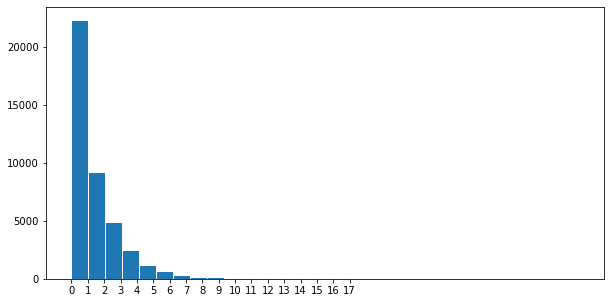

In [7]:
# most_probable home score
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.home_score,bins=30,edgecolor='white')
plt.xticks(range(18))

In [8]:
#data.drop('Total_goals',axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x237cfbfd9a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

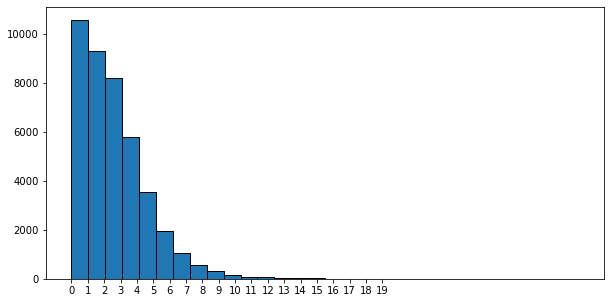

In [9]:
#most probable total goals in a match
import matplotlib.pyplot as plt
data['total_goals']=data['home_score']+data['away_score']
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.total_goals,bins=30,edgecolor='black')
plt.xticks(range(20))

In [10]:
data['date']=data['date'].apply(lambda x : int(str.split(x,'-')[0]))
data['date'].value_counts()
data['date'].min()

TypeError: descriptor 'split' for 'str' objects doesn't apply to a 'int' object

([<matplotlib.axis.XTick at 0x237d0fef1f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

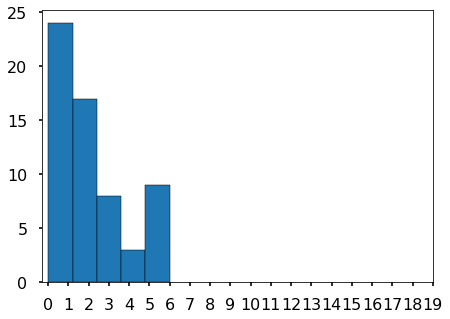

In [12]:
# most probable total goals
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
data['total_goals']=data['home_score']+data['away_score']
style.use('seaborn-poster')
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
plt.hist(data.loc[(data['date']>2019)].total_goals,bins=5,
         edgecolor='black')
plt.xticks(range(20))

In [13]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
rec_data=data.loc[(data['date']>=2000)]
rec_data.iloc[[rec_data.total_goals.argmax()]]
print(rec_data.total_goals.mean())

2.744112130054189


In [23]:
# Poisson probability is: P(x; μ) = (e-μ) (μx) / x!
#lam =2.74
from scipy.special import factorial
import numpy as np
#k is no. of event we want to find the probability of

def poisson(k,exp_events):
    minutes=90
    lam =(exp_events)
    p_k= np.exp(-lam)*np.power(lam,k)/factorial(k)
    #print(f'The probability of {k} goals in {minutes} minutes is {100*p_k:.2f}%.')
    return p_k

In [24]:
#proability of goals acc to poisson distribution
k=[]
p_k=[]
for i in range(10):
    p_k.append(poisson(i,2.74)*100)
    k.append(i)

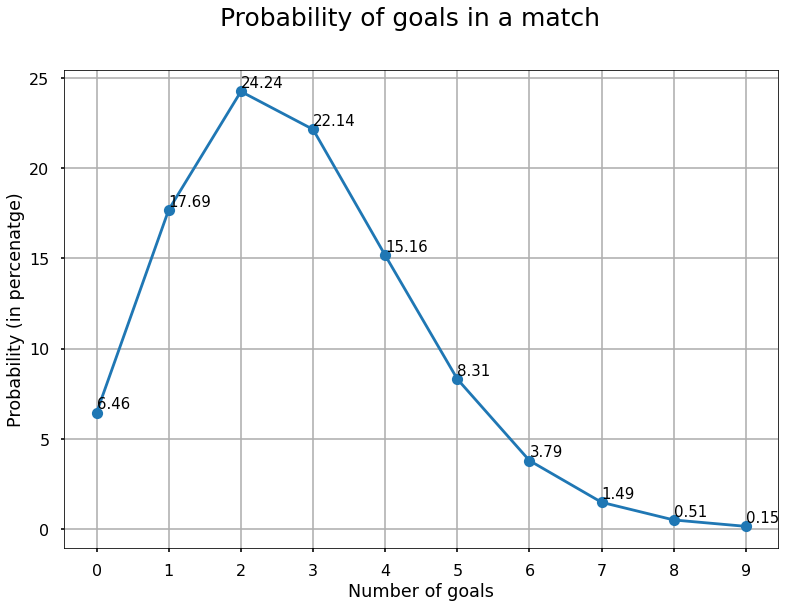

In [25]:
fig = plt.figure()
plt.plot(k,p_k,'o-')
plt.xticks(range(10))
fig.suptitle('Probability of goals in a match',fontsize=25)
plt.xlabel('Number of goals')
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,p_k):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=15)
plt.grid(True)

                  0
count  10000.000000
mean       2.725600
std        1.661319
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000


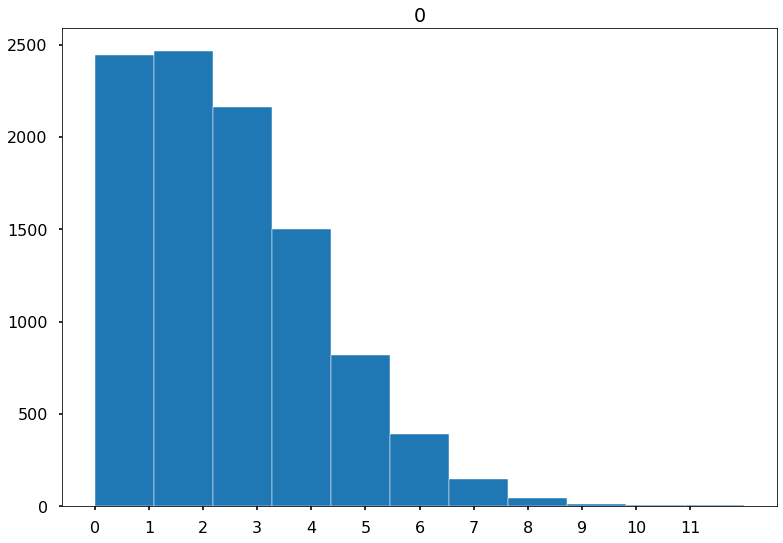

In [26]:
# In 10000 matches simulation goals scored distribution
N=10000
lam=2.74
counts=np.random.poisson(lam,size=N)
df=pd.DataFrame(counts)
print (df.describe())
#print(df[0].value_counts())
df.hist(bins=11,edgecolor='white')
plt.xticks(range(12))
plt.grid(False)

In [27]:
#p_n = poisson(np.arange(100),5)

In [28]:
def p_lessorequal(n_query,exp_events,quiet=True):
    p_n=poisson(np.arange(100),exp_events)
    p=p_n[:n_query+1].sum()
    if quiet:
        return p
    else:
        print(f'{exp_events} goals per game.Probability of {n_query} or fewer goals in 1 game: {100*p:.2f}%.')
    
def p_greaterorequal(n_query,exp_events,quiet=True):
    p = 1 - p_lessorequal(n_query,exp_events)
    if quiet:
        return p
    else:
        print(f'Probability of more than {n_query} goals in 1 game: {100*p:.2f}%.')
        

In [29]:
#probability of scoring more or fewer goals than a particular no.
#p_lessorequal(4,2.87,False)
for i in range(1,10):
    p_greaterorequal(i,2.74,False)

Probability of more than 1 goals in 1 game: 75.85%.
Probability of more than 2 goals in 1 game: 51.61%.
Probability of more than 3 goals in 1 game: 29.47%.
Probability of more than 4 goals in 1 game: 14.31%.
Probability of more than 5 goals in 1 game: 6.00%.
Probability of more than 6 goals in 1 game: 2.21%.
Probability of more than 7 goals in 1 game: 0.72%.
Probability of more than 8 goals in 1 game: 0.21%.
Probability of more than 9 goals in 1 game: 0.06%.


Now from this, we can calculate the probability of seeing ‘x ‘or fewer number of goals simply by adding the probabilities of ‘x’ and the numbers which are less than ‘x’.And by just subtracting this from 1 we can get the probability of seeing more than ‘x’ goals in a match. Let`s plot this too.

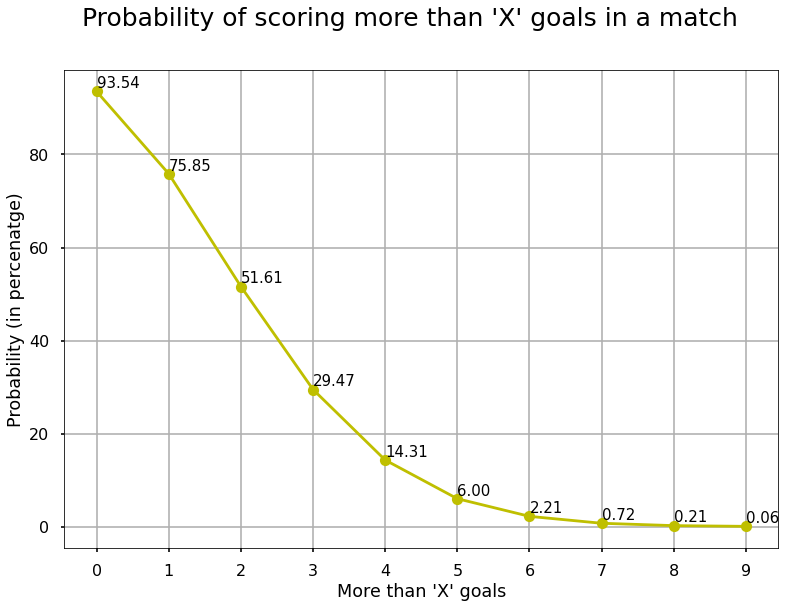

In [30]:
prob=[]
for i in range(10):
    p = p_greaterorequal(i,2.74,True)
    prob.append(p*100)
fig = plt.figure()
plt.plot(k,prob,'o-y')
plt.xticks(range(10))
fig.suptitle("Probability of scoring more than 'X' goals in a match",fontsize=25)
plt.xlabel("More than 'X' goals")
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,prob):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=15)
plt.grid(True)

If we switch on to tv at a random time, then the average time we have to wait to see a goal

The wait is over…

Now suppose you have an impatient friend who does not want to sit for the whole game. And he comes to you during a match and asks how much time does he has to wait to see a goal. Woah, that`s a tough question right, but worry not, ask him to sit through 10000 games and note the time between each goal. Just kidding, obviously, he would freak out. Actually I simulated 10000 matches and found out the average time.

In [31]:
events_per_min=(2.74/90)
np.random.seed(42)
events = np.random.choice([0,1],size=100000,
                          replace=True,
                          p=[1-events_per_min,events_per_min])
success_times = np.where(events==1)[0]
waiting_times = np.diff(success_times)
waiting_times[:10]

array([39, 19, 70, 15, 72, 35, 44, 85, 51,  5], dtype=int64)

In [32]:
def plot_hist_waiting_time(x):
    df = pd.DataFrame(x)
    df.hist(bins=100)

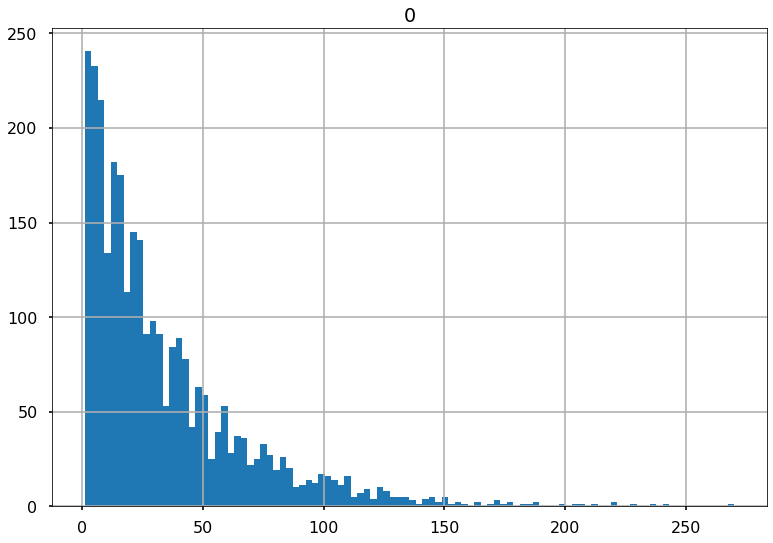

In [33]:
plot_hist_waiting_time(waiting_times)

The most likely waiting time is 2 minutes. But wait this not actually what I was looking for, I want the average time that I have to wait to see a goal if I start watching the game at a random time. For that, I will take 10000 instances, where each instance is watching 10000 games and calculating the average waiting time between goals in that 10000 games and reporting us. Finally, I will be plotting those 10000 reports from each of my instances and find out the expected average waiting time.

In [34]:
#Simulating avg time for 10000 matches to get the actual average time
avg = []
events_per_minute=(2.74/90)
for i in range(10000):
    avg.append(np.mean(np.diff(np.where(np.random.choice([0, 1], size = 100000, replace=True, 
                          p=[1-events_per_minute, events_per_minute]) == 1)[0])))

                  0
count  10000.000000
mean      32.854856
std        0.585513
min       30.843731
25%       32.454870
50%       32.845395
75%       33.247650
max       35.231583


<Figure size 921.6x633.6 with 0 Axes>

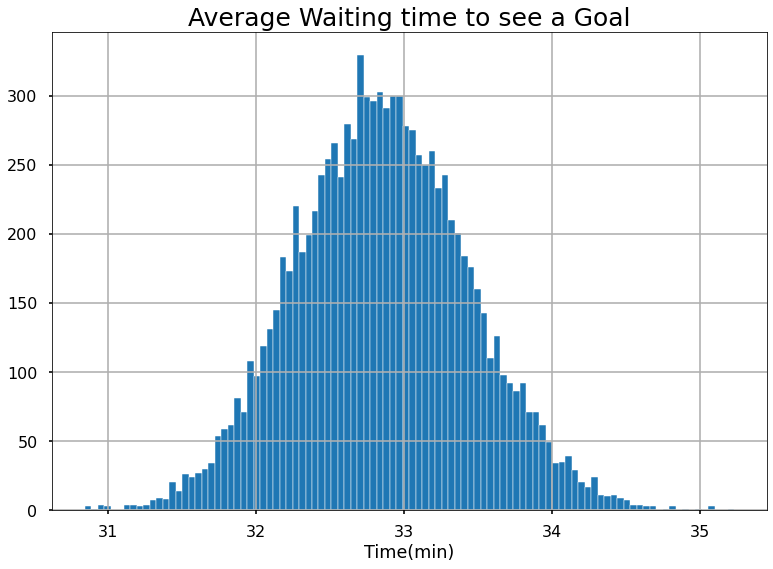

In [35]:
df= pd.DataFrame(avg)
print(df.describe())
fig = plt.figure()
df.hist(bins=100,edgecolor='white')
plt.title('Average Waiting time to see a Goal',fontsize=25)
plt.xlabel('Time(min)')
plt.grid(True)

It looks like we have to wait for 33 minutes approx. However we may have to wait for more, this is a classic Waiting Time Paradox

Predicting the scoreline

Finally, let`s do the question with which we started and the most exciting question that who will win and what will be the scoreline to be precise.

For this, I will use the history between two teams (let them consider as the home team and away team) and take the average_home_score as the expected goals for the home team and average_away_score as the expected goals for the away team and predict the scoreline using Poisson distribution. In case the teams have fewer encounters between them, we will consider a few factors

HS = Mean of home goals scored by the home team throughout history.

AS = Mean of away goals scored by away team throughout history.

HC = Mean of goals conceded in home matches by the home team.

AC = Mean of goals conceded in away matches by the away team.

So, the Home team’s expected score will be calculated as (HS + AC) / 2

So, the Away team’s expected score will be calculated as  (AS + HC) / 2

Wait, the expected score is not the predicted score. The expected score is the average number of goals we expect them to score in a game between them.

In [36]:
len(data[(data.home_team =='England') & (data.away_team =='France')])

13

In [37]:
data['home_team'] = data['home_team'].apply(lambda x: (''.join(x.split())).lower())
data['away_team'] = data['away_team'].apply(lambda x: (''.join(x.split())).lower())

In [38]:
import numpy as np
from scipy import stats
counts = np.random.poisson(2.87,10)
print(int(stats.mode(counts)[0]))

4


In [39]:
import pandas as pd
import numpy as np
from scipy import stats 

def PredictScore():
    
    home_team = input("Enter Home Team: ")
    ht = (''.join(home_team.split())).lower()
    away_team = input("Enter Away Team: ")
    at = (''.join(away_team.split())).lower()
    
    if len(data[(data.home_team ==ht) & (data.away_team ==at)]) > 20:
        
        avg_home_score = data[(data.home_team ==ht) & (data.away_team ==at)].home_score.mean()
        avg_away_score = data[(data.home_team ==ht) & (data.away_team ==at)].away_score.mean()
        
        home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0])                    
        away_goal = int(stats.mode(np.random.poisson(avg_away_score,100000))[0])
        
    else:
        avg_home_goal_conceded = data[(data.home_team ==ht)].away_score.mean()
        avg_away_goal_scored   = data[(data.away_team ==at)].away_score.mean()
        away_goal = int(stats.mode(np.random.poisson(1/2*(avg_home_goal_conceded+avg_away_goal_scored),100000))[0])
        
        avg_away_goal_conceded = data[(data.home_team ==at)].home_score.mean()
        avg_home_goal_scored   = data[(data.away_team ==ht)].home_score.mean()
        home_goal = int(stats.mode(np.random.poisson(1/2*(avg_away_goal_conceded+avg_home_goal_scored),100000))[0])
    
    avg_total_score = int(stats.mode(
        np.random.poisson((data[(data.home_team ==ht) & (data.away_team ==at)].total_goals.mean()),100000))[0])
    
    print(f'Expected total goals are {avg_total_score}')
    print(f'They have played {len(data[(data.home_team ==ht) & (data.away_team ==at)])} matches')
    print(f'The scoreline is {home_team} {home_goal}:{away_goal} {away_team}')

Let`s try with Brazil as the home team and Mexico as the away team.

In [40]:
PredictScore()

Enter Home Team: Brazil
Enter Away Team: England
Expected total goals are 2
They have played 12 matches
The scoreline is Brazil 1:1 England
